<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---

## Model Submission Guide: World Happiness Classification Competition
Let's share our models to a centralized leaderboard, so that we can collaborate and learn from the model experimentation process...

**Contents:**
AdvML Q2: 
1. Get data in and set up X_train / X_test / y_train
2. Bivariate Results
3. Predictive Features
4. 3 Prediction Models



## 1. Get data in and set up X_train, X_test, y_train objects

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     |████████████████████████████████| 131 kB 5.4 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 22.3 MB 85.1 MB/s 
     |████████████████████████████████| 96 kB 4.5 MB/s 
     |████████████████████████████████| 131 kB 62.3 MB/s 
     |████████████████████████████████| 7.7 MB 16.7 MB/s 
     |████████████████████████████████| 4.9 MB 38.5 MB/s 
     |████████████████████████████████| 12.7 MB 22.5 MB/s 
     |████████████████████████████████| 146 kB 67.1 MB/s 
     |████████████████████████████████| 273 kB 44.9 MB/s 
     |████████████████████████████████| 127 kB 59.4 MB/s 
     |████████████████████████████████| 435 kB 50.5 MB/s 
     |████████████████████████████████| 178 kB 62.4 MB/s 
     |████████████████████████████████| 300 kB 54.8 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |█████████████████

In [2]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/world_happiness_competition_data-repository:latest') 


Data downloaded successfully.


In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


In [4]:
y_train.head(10)

,Average,High,Low,Very High,Very Low
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,1,0,0,0
6,1,0,0,0,0
7,0,0,1,0,0
8,1,0,0,0,0
9,0,0,0,1,0


##2. Bivariate Results

Initially I tried using a scatter plot to see if there was an easily separable relationship between high vs low ratings of happiness in relation to generosity. It seems like there are far more countries that did not rate high or very high, and those range across generosity. For the countries that were rated as Very High in happiness, there seems to be a slightly higher level of generosity than those that rated 'High' but the amount of overlap and the binary outcome variable makes it difficult to see, so I tried another visualization below.

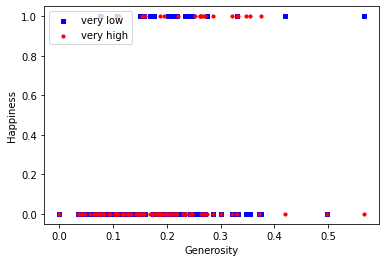

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_train.Generosity, y_train['Very Low'], s=10, c='b', marker="s", label='very low')
ax1.scatter(X_train.Generosity, y_train['Very High'], s=10, c='r', marker="o", label='very high')
plt.legend(loc='upper left');
plt.xlabel('Generosity')
plt.ylabel('Happiness')
plt.show()

(don't forget to add second visualization below)



##3. Predictive Features

##4. Prediction Model 1

### Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [28]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [29]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(104, 26)

In [30]:
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


In [10]:
y_train.head()

,Average,High,Low,Very High,Very Low
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,1,0


### Fit model 1 on preprocessed data and save preprocessor function and model 


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier(n_estimators=300, max_depth=3)
model1.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.

print(model1.score(preprocessor(X_train), y_train_labels) )# Fit score, 0-1 scale.


0.8365384615384616


"\nparam_grid = {'n_estimators': [100, 200, 300],\n              'max_depth': [3,5,7]}\n\ngrid = GridSearchCV(model1, param_grid)\ngrid.fit(X_train, y_train)\n\nprint(grid.best_n_estimators_)\nprint(grid.best_score_)\n"

In [ ]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3,5,7]}

grid = GridSearchCV(model1, param_grid)
grid.fit(X_train, y_train)

print(grid.best_n_estimators_)
print(grid.best_score_)



### Fit model 2 on preprocessed data and save preprocessor function and model 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=10)
model2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(model2.score(preprocessor(X_train), y_train_labels)))

accuracy: 0.72


### Fit model 3 on preprocessed data and save preprocessor function and model 

In [54]:
from sklearn.svm import SVC # "Support vector classifier"
model3 = SVC(kernel='linear', C=100) # kernel and C are the main args to adjust for linear SVC
model3.fit(preprocessor(X_train), y_train_labels)
print(model3.score(preprocessor(X_train), y_train_labels))

0.9519230769230769


#### Save preprocessor function to local "preprocessor.zip" file

In [55]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [61]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

### Generate predictions from X_test data and submit model to competition


In [62]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://c3maq947kb.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [63]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [64]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model3.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 156

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


In [65]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,inputlayer_layers,concatenate_layers,batchnormalization_layers,dropout_layers,dense_layers,softmax_act,sigmoid_act,relu_act,loss,optimizer,model_config,memory_size,username,version
0,57.69%,56.85%,61.48%,58.36%,keras,False,True,Sequential,5.000000,18117.000000,nan,nan,nan,nan,5.000000,1.000000,nan,4.000000,str,SGD,"{'name': 'sequential', 'layers...",1461312.000000,yl4590,18
2,55.77%,55.97%,60.95%,56.35%,keras,False,True,Sequential,6.000000,358405.000000,nan,nan,nan,nan,6.000000,1.000000,nan,2.000000,str,SGD,"{'name': 'sequential_7', 'laye...",1263864.000000,melissa_feeney,115
3,53.85%,52.62%,63.74%,56.71%,sklearn,False,False,KNeighborsClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'algorithm': 'auto', 'leaf_si...",nan,wxmkevin,74
4,53.85%,52.62%,63.74%,56.71%,sklearn,False,False,KNeighborsClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'algorithm': 'auto', 'leaf_si...",nan,wxmkevin,97
5,55.77%,55.90%,59.92%,56.32%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'bootstrap': True, 'ccp_alpha...",nan,shm2166,99
6,55.77%,55.36%,60.04%,54.83%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'ccp_alpha': 0.0, 'criterion'...",nan,jc5492,11
7,55.77%,55.36%,60.04%,54.83%,sklearn,False,False,VotingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'estimators': [('lr', Logisti...",nan,jc5492,12
8,53.85%,53.60%,60.07%,54.32%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'bootstrap': True, 'ccp_alpha...",nan,qy2245,40
9,53.85%,53.67%,59.67%,53.85%,sklearn,False,False,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"{'ccp_alpha': 0.0, 'criterion'...",nan,bestcookna,42
10,51.92%,51.91%,62.98%,53.70%,keras,False,True,Sequential,5.000000,18117.000000,nan,nan,nan,nan,5.000000,1.000000,nan,4.000000,str,Adam,"{'name': 'sequential', 'layers...",1772024.000000,qy2245,53
